In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
refFileName="2D_scDCT_ref.jpg"  # This will stay fixed
image1=cv2.imread(refFileName,cv2.IMREAD_COLOR)
image2=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)

imageFileName="NoisyGroudTruth.jpg"
image2=cv2.imread(imageFileName,cv2.IMREAD_COLOR)
image2=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'Will change')

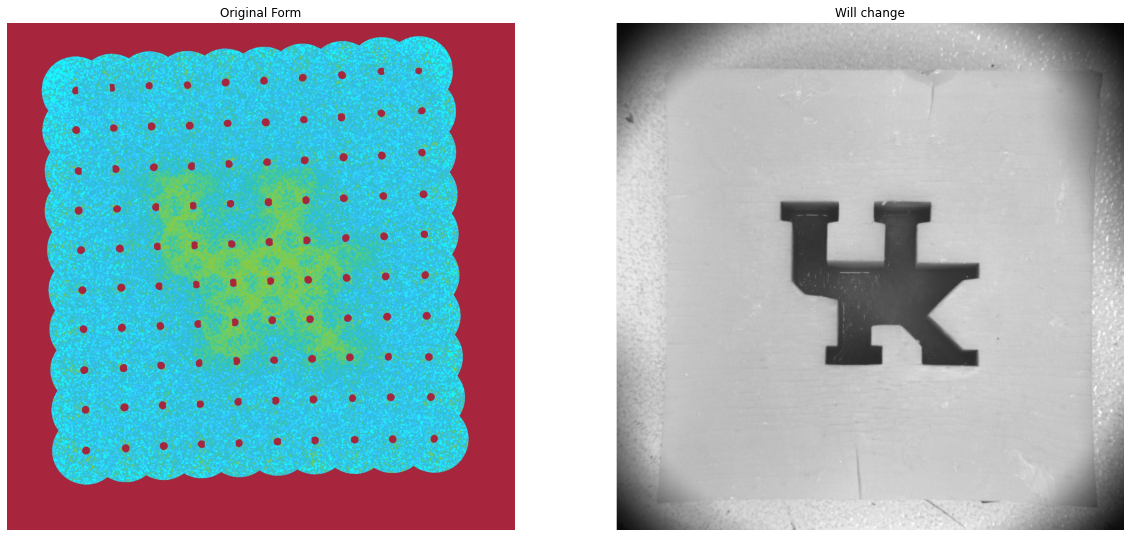

In [3]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.axis('off');plt.imshow(image1);plt.title('Original Form')
plt.subplot(122);plt.axis('off');plt.imshow(image2);plt.title('Will change')

In [12]:
image1_gray=cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image2_gray=cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)

maxNumFeatures=200
orb=cv2.ORB_create(maxNumFeatures)
keypoints1,descriptors1=orb.detectAndCompute(image1_gray,None)
keypoints2,descriptors2=orb.detectAndCompute(image2_gray,None)

image1_display=cv2.drawKeypoints(image1,keypoints1,outImage=np.array([]),color=(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2_display=cv2.drawKeypoints(image2,keypoints2,outImage=np.array([]),color=(255,0,0),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

Text(0.5, 1.0, 'Will change')

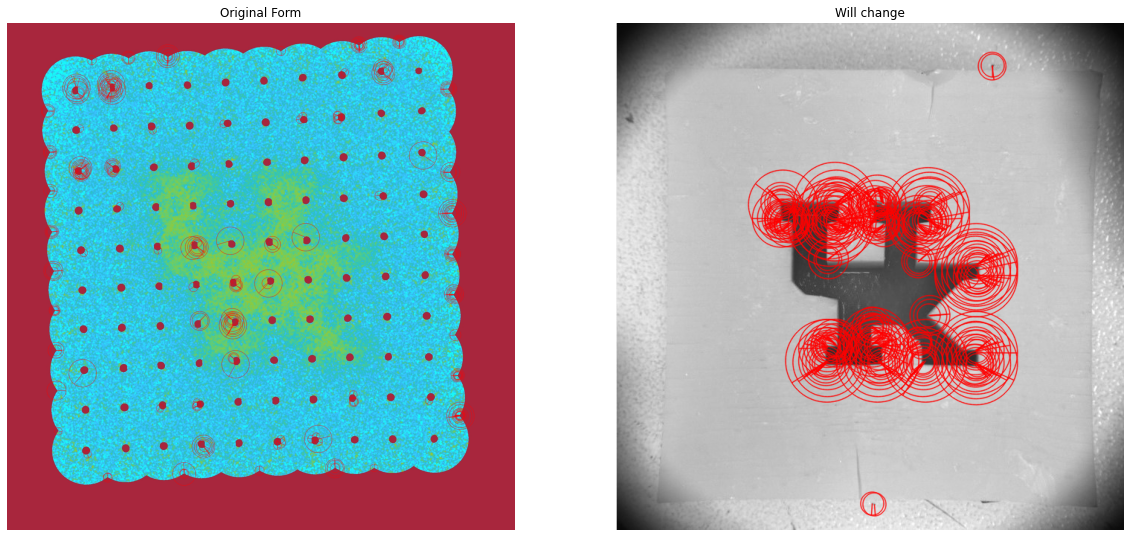

In [13]:
plt.figure(figsize=[20,10])
plt.subplot(121);plt.axis('off');plt.imshow(image1_display);plt.title('Original Form')
plt.subplot(122);plt.axis('off');plt.imshow(image2_display);plt.title('Will change')

In [16]:
# Match Features
matcher=cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches=matcher.match(descriptors1, descriptors2, None)


In [18]:
print(matches)

(< cv2.DMatch 000001BCCA723910>, < cv2.DMatch 000001BCCBCC0E90>, < cv2.DMatch 000001BCCBCC0E30>, < cv2.DMatch 000001BCCBCC0EB0>, < cv2.DMatch 000001BCCBCC0EF0>, < cv2.DMatch 000001BCCBCC0E70>, < cv2.DMatch 000001BCCBCC0DB0>, < cv2.DMatch 000001BCCBCC07B0>, < cv2.DMatch 000001BCCBCC0F10>, < cv2.DMatch 000001BCCBCC0F30>, < cv2.DMatch 000001BCCBCC0F50>, < cv2.DMatch 000001BCCBCC0F70>, < cv2.DMatch 000001BCCBCC0F90>, < cv2.DMatch 000001BCCBCC0FB0>, < cv2.DMatch 000001BCCBCC0FD0>, < cv2.DMatch 000001BCD65F1ED0>, < cv2.DMatch 000001BCD65F1030>, < cv2.DMatch 000001BCD65F1050>, < cv2.DMatch 000001BCD65F1070>, < cv2.DMatch 000001BCD65F1090>, < cv2.DMatch 000001BCD65F10B0>, < cv2.DMatch 000001BCD65F10D0>, < cv2.DMatch 000001BCD65F10F0>, < cv2.DMatch 000001BCD65F1110>, < cv2.DMatch 000001BCD65F1130>, < cv2.DMatch 000001BCD65F1150>, < cv2.DMatch 000001BCD65F1170>, < cv2.DMatch 000001BCD65F1190>, < cv2.DMatch 000001BCD65F11B0>, < cv2.DMatch 000001BCD65F11D0>, < cv2.DMatch 000001BCD65F11F0>, < cv2.D

In [20]:

# Sort matches by score
matches.sorted(key=lambda x: x.distance, reverse= False)

# Remove not so good matches
numGoodMatches=int(len(matches)*0.1)
matches=matches[:numGoodMatches]

AttributeError: 'tuple' object has no attribute 'sorted'